# Analyzing the Top 50 Global Spotify Tracks - 2020 to 2023

After extracting playlist data for the top tracks of the year for 2020, 2021, 2022, & 2023 via spotify's public api, this notebook utilizes csv data from the api collection and examines notable trends of top charting music in the past four years. 

### Installing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
!pip install pandadoc

### Load Data

In [2]:
# Initializing our Individual Dataframes
top2020 = pd.read_csv('topTracksOf2020.csv')
top2021 = pd.read_csv('topTracksOf2021.csv')
top2022 = pd.read_csv('topTracksOf2022.csv')
top2023 = pd.read_csv('topTracksOf2023.csv')

# Check any dataframe 
# top2022.head()

### Data Wrangling

In [3]:
# Adding chart year to each data fram for songs that may be in the chart for multiple years
top2020['chart_year'] = 2020
top2021['chart_year'] = 2021
top2022['chart_year'] = 2022
top2023['chart_year'] = 2023

# Concatenating the Dataframes
top_tracks_df = pd.concat([top2020, top2021, top2022, top2023])

# Understanding Our Data Structure
print(top_tracks_df.shape)
print(top_tracks_df.columns)

# Identifying Main Artist Genre 
# Spotify Returns Artist Genre as a list of strings, the first is identified to be their broadest category
# and is sufficent for the purposes of our analysis
top_tracks_df['artist_genres'] = top_tracks_df['artist_genres'].apply(eval) # Type object, should be list
top_tracks_df['artist_genre'] = top_tracks_df['artist_genres'].apply(lambda x: x[0] if x else None) # Getting first item

# Dropping redundant API info to isolate variables we want to analyse
top_tracks_df.drop(columns=['Unnamed: 0', 'index_x', 'track_id', 'artist_id', 'artist_genres', 'index_y'], inplace = True)

# Check Dataframe
top_tracks_df = top_tracks_df.sort_values('track_popularity', ascending=False) # Sort by popularity
top_tracks_df.reset_index(drop=True, inplace=True)
top_tracks_df.head(12)

(200, 23)
Index(['Unnamed: 0', 'index_x', 'artist_name', 'track_name', 'track_id',
       'track_popularity', 'artist_id', 'artist_popularity', 'artist_genres',
       'artist_followers', 'index_y', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chart_year'],
      dtype='object')


,artist_name,track_name,track_popularity,artist_popularity,artist_followers,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chart_year,artist_genre
0,Taylor Swift,Cruel Summer,96,100,106430450,0.552,0.702,-5.707,0.1570,0.11700,0.000021,0.1050,0.564,169.994,178427,4.0,2023,pop
1,Noah Kahan,Stick Season,94,87,2571985,0.662,0.488,-6.894,0.0682,0.78200,0.000000,0.1020,0.817,117.913,182347,4.0,2022,pov: indie
2,Arctic Monkeys,I Wanna Be Yours,92,86,24058026,0.464,0.417,-9.345,0.0256,0.13600,0.022000,0.0974,0.479,67.528,183956,4.0,2023,garage rock
3,Harry Styles,As It Was,91,85,31662371,0.520,0.731,-5.338,0.0557,0.34200,0.001010,0.3110,0.662,173.930,167303,4.0,2022,pop
4,The Weeknd,Starboy,91,95,81435797,0.679,0.587,-7.015,0.2760,0.14100,0.000006,0.1370,0.486,186.003,230453,4.0,2023,canadian contemporary r&b
5,Jimin,Like Crazy,91,82,7846127,0.629,0.733,-5.445,0.0419,0.00250,0.000000,0.3570,0.362,120.001,212241,4.0,2023,k-pop
6,Olivia Rodrigo,vampire,91,90,34620431,0.511,0.532,-5.745,0.0578,0.17700,0.000000,0.2910,0.350,138.005,219724,4.0,2023,pop
7,Harry Styles,As It Was,91,85,31650918,0.520,0.731,-5.338,0.0557,0.34200,0.001010,0.3110,0.662,173.930,167303,4.0,2023,pop
8,Miley Cyrus,Flowers,91,86,23536264,0.706,0.691,-4.775,0.0633,0.05840,0.000070,0.0232,0.632,118.048,200600,4.0,2023,pop
9,David Kushner,Daylight,90,77,2074960,0.508,0.430,-9.475,0.0335,0.83000,0.000441,0.0930,0.324,130.090,212954,4.0,2023,gen z singer-songwriter


In [4]:
# Convert time_signature and chart_year to categorical variables
top_tracks_df['time_signature'] = top_tracks_df['time_signature'].astype('category')
top_tracks_df['chart_year'] = top_tracks_df['chart_year'].astype('category')

In [5]:
# Saving to csv for future use
# top_tracks_df.to_csv('topTracksOf2020to2023.csv')

### Summary Statistics 

In [6]:
# Set the display options
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Summary Stats
top_tracks_df.describe()

,track_popularity,artist_popularity,artist_followers,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000
mean,80.460,83.960,31608644.810,0.686,0.632,-6.138,0.095,0.250,0.015,0.176,0.508,122.360,199370.055
std,7.835,9.126,31301883.795,0.134,0.144,1.953,0.087,0.247,0.081,0.131,0.227,29.164,45454.402
min,11.000,57.000,121062.000,0.332,0.192,-14.454,0.026,0.000,0.000,0.023,0.060,67.033,123987.000
25%,76.000,78.000,5396442.750,0.584,0.537,-7.241,0.040,0.052,0.000,0.093,0.334,98.022,172996.000
50%,81.000,85.000,21132055.000,0.704,0.661,-5.748,0.056,0.165,0.000,0.120,0.506,120.023,197286.500
75%,85.000,90.000,43837343.750,0.788,0.730,-4.764,0.110,0.350,0.000,0.230,0.688,139.994,220239.750
max,96.000,100.000,106532993.000,0.935,0.965,-2.810,0.487,0.934,0.657,0.790,0.958,203.759,613027.000


### Radar Chart of Audio Features

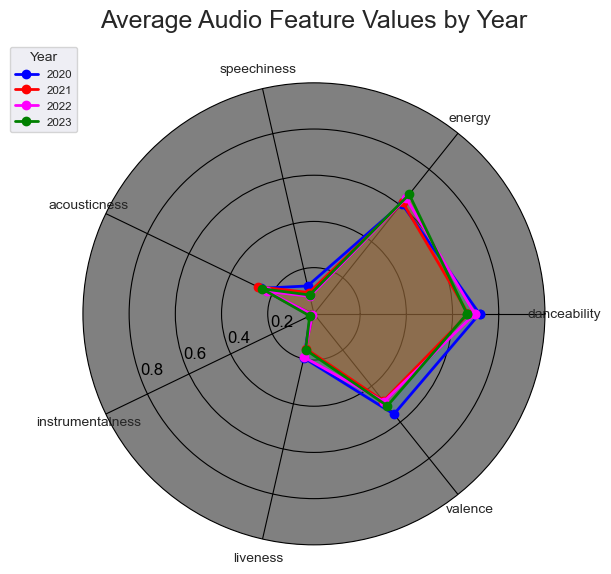

In [19]:
# Saving features for every year
audio_features20 = top2020.loc[:,['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
audio_features21 = top2021.loc[:,['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
audio_features22 = top2022.loc[:,['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
audio_features23 = top2023.loc[:,['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]

# Saving stats
radar_labels = list(audio_features20)[:]
radar20_stats = audio_features20.mean().tolist()
radar21_stats = audio_features21.mean().tolist()
radar22_stats = audio_features22.mean().tolist()
radar23_stats = audio_features23.mean().tolist()

angles = np.linspace(0, 2*np.pi, len(radar_labels), endpoint=False)

# Close Plot
radar20_stats = np.concatenate((radar20_stats,[radar20_stats[0]]))
radar21_stats = np.concatenate((radar21_stats,[radar21_stats[0]]))
radar22_stats = np.concatenate((radar22_stats,[radar22_stats[0]]))
radar23_stats = np.concatenate((radar23_stats,[radar23_stats[0]]))
angles = np.concatenate((angles,[angles[0]]))

# Size of the figure
fig = plt.figure(figsize=(6, 6))

# Plot for 2020
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, radar20_stats, 'o-', linewidth=2, label="2020", color='blue')
ax.fill(angles, radar20_stats, alpha=0.25)
ax.set_facecolor('grey')
ax.set_rlabel_position(200)
ax.spines['polar'].set_visible(True)  
ax.spines['polar'].set_color('black')
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="black", size=12)
plt.ylim(0,1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(radar_labels)

# Plot for 2021
ax.plot(angles, radar21_stats, 'o-', linewidth=2, label="2021", color='red')
ax.fill(angles, radar21_stats, alpha=0.25)

# Plot for 2022
ax.plot(angles, radar22_stats, 'o-', linewidth=2, label="2022", color='magenta')
ax.fill(angles, radar22_stats, alpha=0.25)

# Plot for 2023
ax.plot(angles, radar23_stats, 'o-', linewidth=2, label="2023", color='green')
ax.fill(angles, radar23_stats, alpha=0.25)
ax.set_title('Average Audio Feature Values by Year', fontsize=18, pad=40)
ax.grid(True, color='black')

plt.legend(loc='best', bbox_to_anchor=(0., 0.59, 0, 0.5), title='Year', fontsize='small')
plt.show()

The above radar displays the average feature values of the most popualr 50 tracks of the year for 2020 to 2023. This chart is important as it is clear, year by year, there is a trend in the average audio feature makeup of popular music. What typically is making the charts and into Spotify's most popular music are songs posessing high energy, danceability, and valence (happiness or upbeatness of a track). 

These features combined make sense together to be in uniform higher levels, but what lower levels of speechiness and instrumentalness suggest are an affinity for more electronic genres of music, including house, electro pop, techno, and dance hall to name a few.

### Correlation Exploration

In [8]:
# Function for exploring correlation
def corr_map(df, method, title):
    
    # Calculate correlation matrix
    correlation_map = df.corr(method=method)
    
    # Plot correlation heatmap
    plt.figure(figsize=(14, 6))
    corrmap = sns.heatmap(correlation_map, annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='viridis', linewidths=1, linecolor='Black')
    corrmap.set_title(title)
    corrmap.set_xticklabels(corrmap.get_xticklabels(), rotation=90)

/var/folders/bs/_h1fsr8d6_g67rh2_kt902nm0000gn/T/ipykernel_83955/1475741650.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_map = df.corr(method=method)


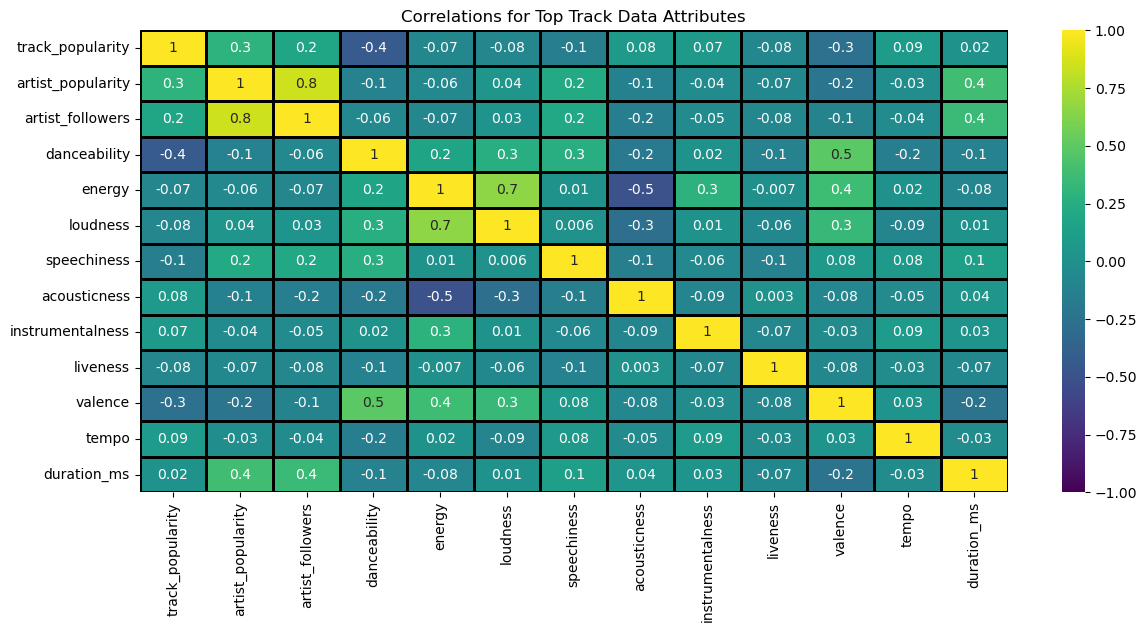

In [9]:
corr_map(top_tracks_df, 'spearman', 'Correlations for Top Track Data Attributes')

The above displays the correlations of the numeric attributes across our entire dataset, using the spearman coefficent. Closer to 1 indicates a postive correlation and closer to -1 indicates a negative correlation between variables. 

Notable Correlations (Anything north of 0.4 or south of -0.4)
- Valence & Danceability
- Energy & Loudness
- Acousticness & Energy
- Artist Followers & Artist Popularity (Self explanitory correlation)
- Valence & Energy

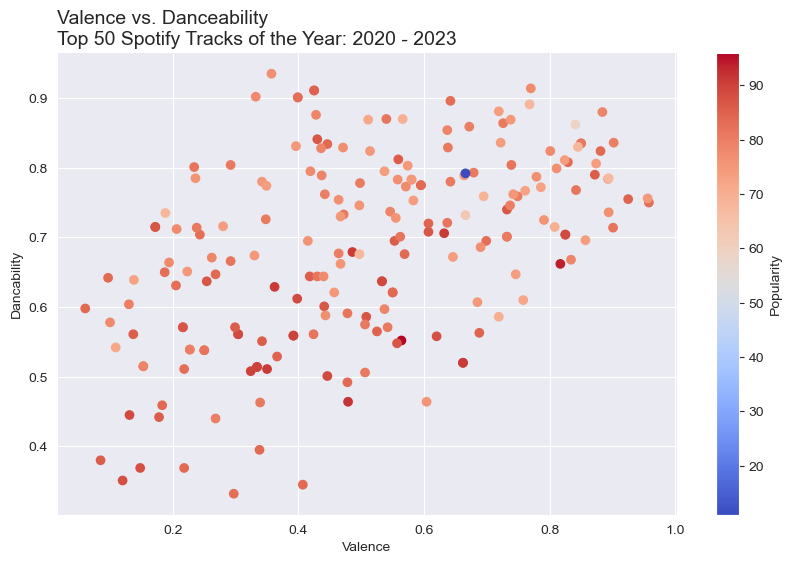

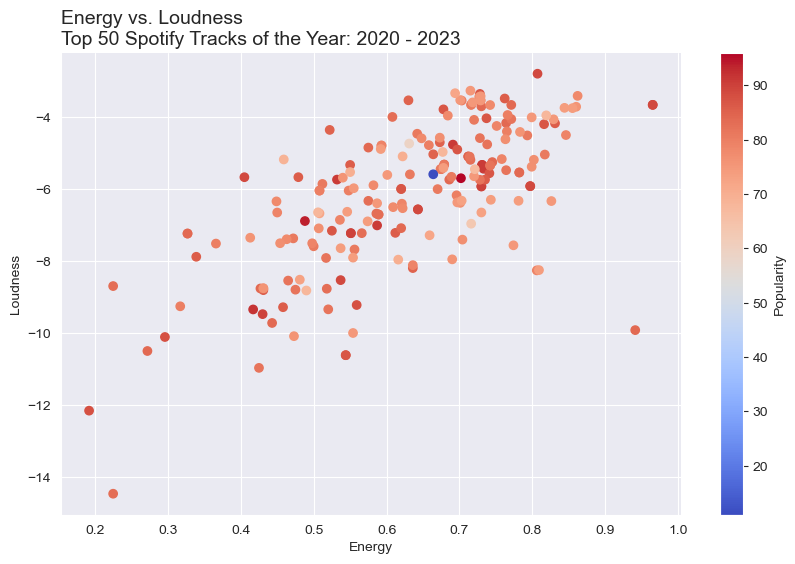

In [10]:
# Scatter plot for valence and danceability - example of medium to weak positve correlation
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")  # Set the style to ggplot with a grey background
scatter = plt.scatter(data=top_tracks_df, x='valence', y='danceability', c='track_popularity', cmap='coolwarm')
plt.colorbar(scatter, label='Popularity')
plt.title('Valence vs. Danceability \nTop 50 Spotify Tracks of the Year: 2020 - 2023', loc='left', fontsize=14)
plt.xlabel('Valence')
plt.ylabel('Dancability')
sns.despine()
plt.show()

# Scatter plot for loudness and energy - example of medium to strong positive correlation
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")  # Set the style to ggplot with a grey background
scatter = plt.scatter(data=top_tracks_df, x='energy', y='loudness', c='track_popularity', cmap='coolwarm')
plt.colorbar(scatter, label='Popularity')
plt.title('Energy vs. Loudness \nTop 50 Spotify Tracks of the Year: 2020 - 2023', loc='left', fontsize=14)
plt.xlabel('Energy')
plt.ylabel('Loudness')
sns.despine()
plt.show()

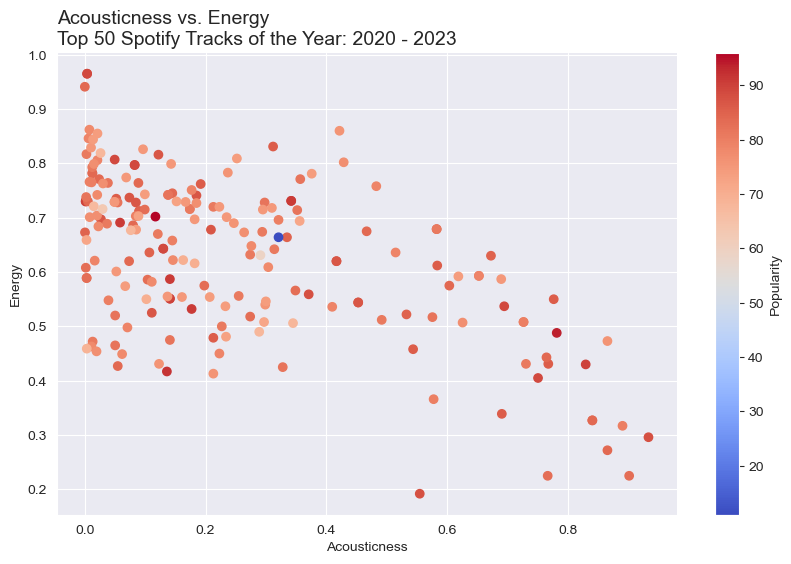

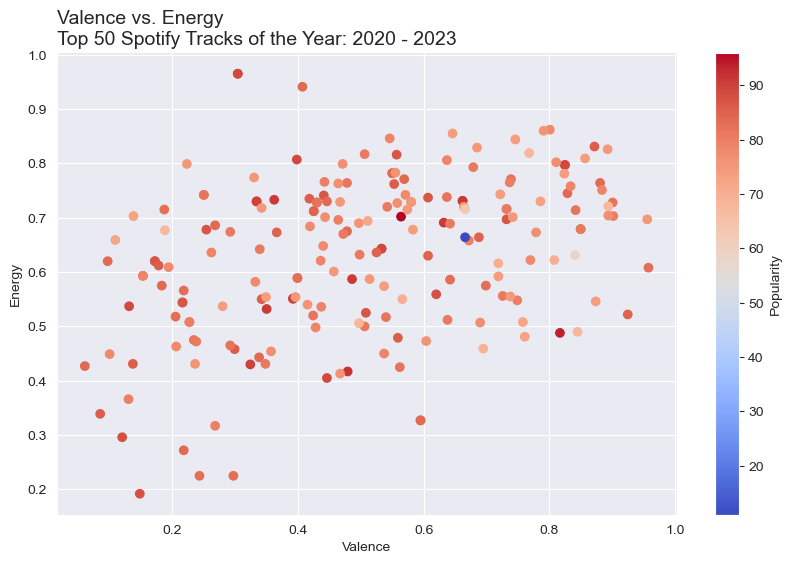

In [11]:
# Scatter plot for acousticness and energy - example of medium to weak negative correlation
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")  # Set the style to ggplot with a grey background
scatter = plt.scatter(data=top_tracks_df, x='acousticness', y='energy', c='track_popularity', cmap='coolwarm')
plt.colorbar(scatter, label='Popularity')
plt.title('Acousticness vs. Energy \nTop 50 Spotify Tracks of the Year: 2020 - 2023', loc='left', fontsize=14)
plt.xlabel('Acousticness')
plt.ylabel('Energy')
sns.despine()
plt.show()

# Scatter plot for valence and energy - example of very weak to weak positive correlation
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")  # Set the style to ggplot with a grey background
scatter = plt.scatter(data=top_tracks_df, x='valence', y='energy', c='track_popularity', cmap='coolwarm')
plt.colorbar(scatter, label='Popularity')
plt.title('Valence vs. Energy \nTop 50 Spotify Tracks of the Year: 2020 - 2023', loc='left', fontsize=14)
plt.xlabel('Valence')
plt.ylabel('Energy')
sns.despine()
plt.show()

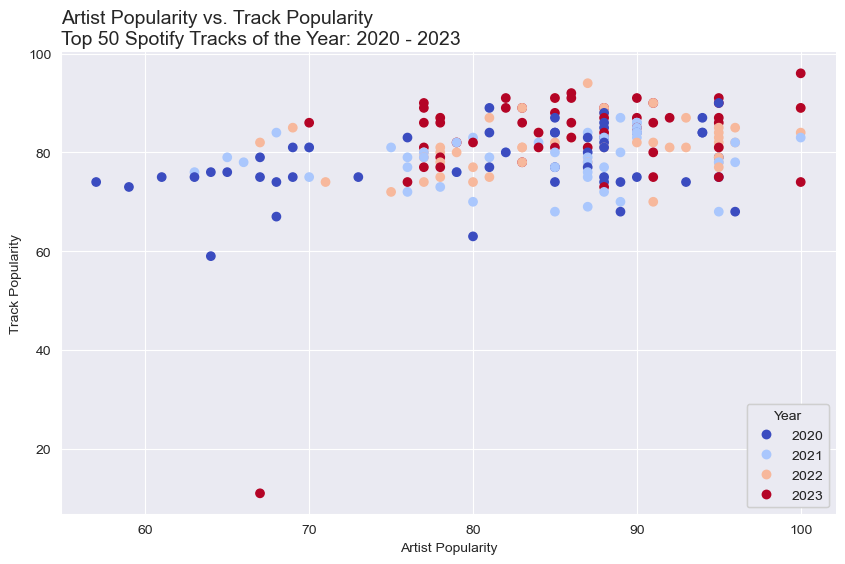

In [12]:
# Scatter plot for popularity and artist popularity - example of very weak to weak positive correlation
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")  # Set the style to ggplot with a grey background
scatter = plt.scatter(data=top_tracks_df, x='artist_popularity', y='track_popularity', c=top_tracks_df['chart_year'], cmap='coolwarm')
plt.title('Artist Popularity vs. Track Popularity \nTop 50 Spotify Tracks of the Year: 2020 - 2023', loc='left', fontsize=14)
plt.xlabel('Artist Popularity')
plt.ylabel('Track Popularity')
legend = plt.legend(*scatter.legend_elements(), title='Year', loc='lower right')  
plt.gca().add_artist(legend) 
sns.despine()
plt.show()

### Genre Trends

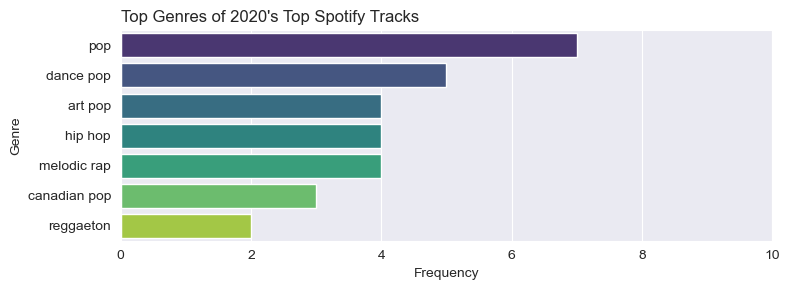

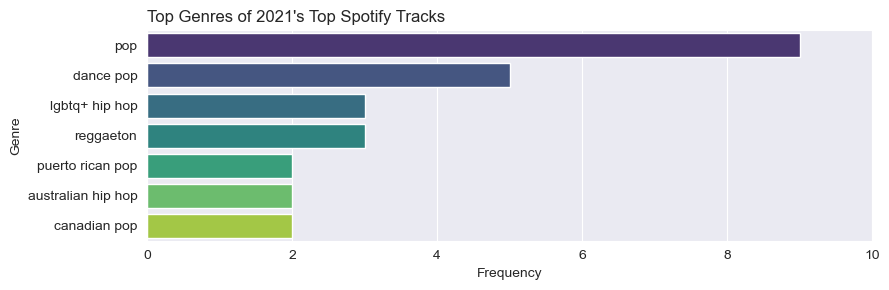

In [13]:
# Filter the DataFrame for the year 2020
genres_2020 = top_tracks_df[top_tracks_df['chart_year'] == 2020]['artist_genre']
# Calculate the value counts for genres in 2020
top_genres_2020 = genres_2020.value_counts().head(7)
# Plotting
plt.figure(figsize=(8, 3))
sns.barplot(x=top_genres_2020.values, y=top_genres_2020.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.xlim(0,10)
plt.title('Top Genres of 2020\'s Top Spotify Tracks', loc='left')
plt.tight_layout()
plt.show()

# 2021
genres_2021 = top_tracks_df[top_tracks_df['chart_year']==2021]['artist_genre']
top_genres_2021 = genres_2021.value_counts().head(7)
plt.figure(figsize=(9,3))
sns.barplot(x=top_genres_2021.values, y=top_genres_2021.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.xlim(0,10)
plt.title('Top Genres of 2021\'s Top Spotify Tracks', loc='left')
plt.tight_layout()
plt.show()

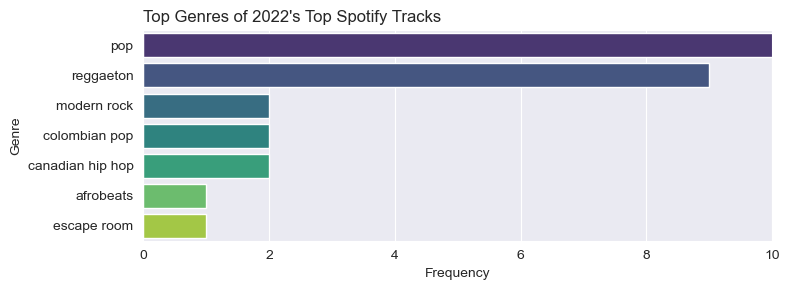

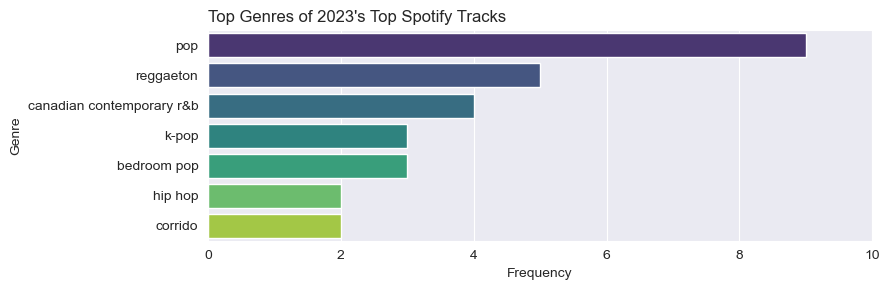

In [14]:
# 2022
genres_2022 = top_tracks_df[top_tracks_df['chart_year']==2022]['artist_genre']
top_genres_2022 = genres_2022.value_counts().head(7)
plt.figure(figsize=(8, 3))
sns.barplot(x=top_genres_2022.values, y=top_genres_2022.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.xlim(0, 10)
plt.title('Top Genres of 2022\'s Top Spotify Tracks', loc='left')
plt.tight_layout()
plt.show()

# 2023
genres_2023 = top_tracks_df[top_tracks_df['chart_year']==2023]['artist_genre']
top_genres_2023 = genres_2023.value_counts().head(7)
plt.figure(figsize=(9, 3))
sns.barplot(x=top_genres_2023.values, y=top_genres_2023.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.xlim(0, 10)
plt.title('Top Genres of 2023\'s Top Spotify Tracks', loc='left')
plt.tight_layout()
plt.show()

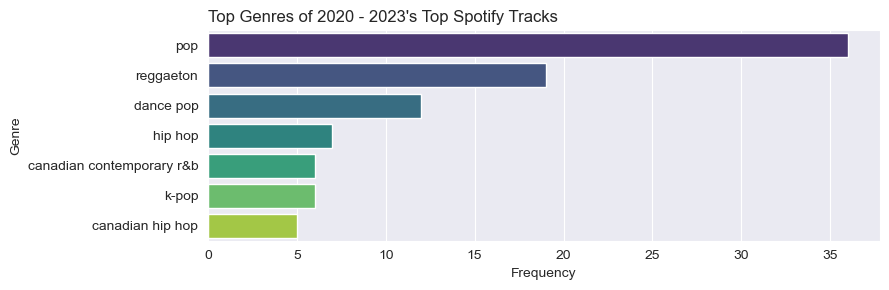

In [15]:
# 2020 - 2023
genres_all = top_tracks_df['artist_genre']
top_genres_all = genres_all.value_counts().head(7)
plt.figure(figsize=(9, 3))
sns.barplot(x=top_genres_all.values, y=top_genres_all.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.title('Top Genres of 2020 - 2023\'s Top Spotify Tracks', loc='left')
plt.tight_layout()
plt.show()

With no less than at least 7 tracks of 50 in the past 4 years, pop, not including its various subgeneres dominated Spotify's top tracks **making up 20% of the roster in 2022.** This is unsurprising with nearly 40 songs out of 200 in our dataset as a whole being classed as general pop. 

Reggaeton comes in a not so close second with Bad Bunny's domminace in 2022 spilling into the charts for 2023. Two 'canadian' genres are listed in the top generes of 2023 with The Weeknd & Drake being the main proprietors of this. In every year of our dataset, The Weeknd or Drake held some spot among the top 50, and their consistency places the canadian subgeneres among the most popular. 2 pop subgenres held top spots further establishing as expected pop dominance.

### Artist Trends

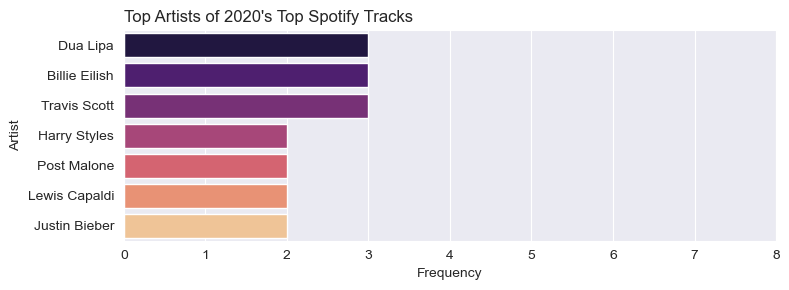

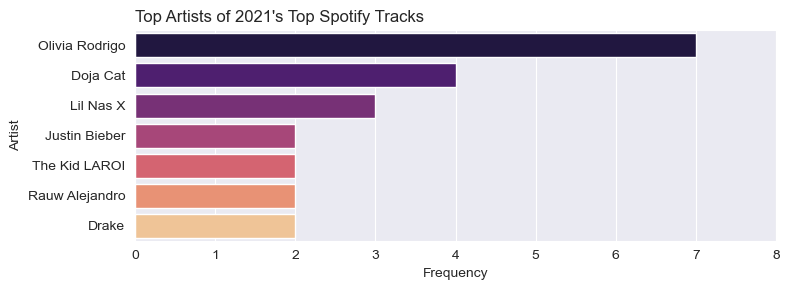

In [16]:
# Filter the DataFrame for the year 2020
artists_2020 = top_tracks_df[top_tracks_df['chart_year'] == 2020]['artist_name']
# Calculate the value counts for artists in 2020
top_artists_2020 = artists_2020.value_counts().head(7)
# Plot
plt.figure(figsize=(8, 3))
sns.barplot(x=top_artists_2020.values, y=top_artists_2020.index, palette='magma')
plt.xlabel('Frequency')
plt.ylabel('Artist')
plt.xlim(0,8)
plt.title('Top Artists of 2020\'s Top Spotify Tracks', loc='left')
plt.tight_layout()
plt.show()

# 2021
artists_2021 = top_tracks_df[top_tracks_df['chart_year'] == 2021]['artist_name']
top_artists_2021 = artists_2021.value_counts().head(7)
plt.figure(figsize=(8, 3))
sns.barplot(x=top_artists_2021.values, y=top_artists_2021.index, palette='magma')
plt.xlabel('Frequency')
plt.ylabel('Artist')
plt.xlim(0, 8)
plt.title('Top Artists of 2021\'s Top Spotify Tracks', loc='left')
plt.tight_layout()
plt.show()

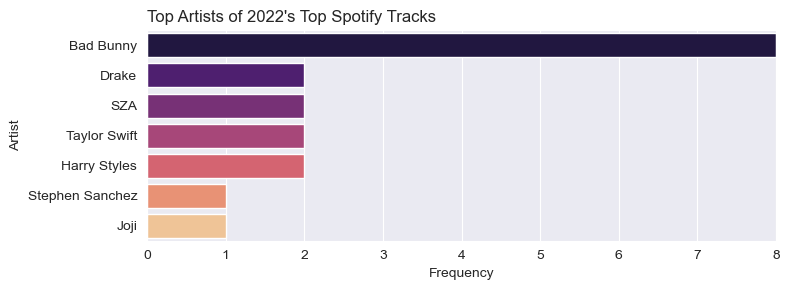

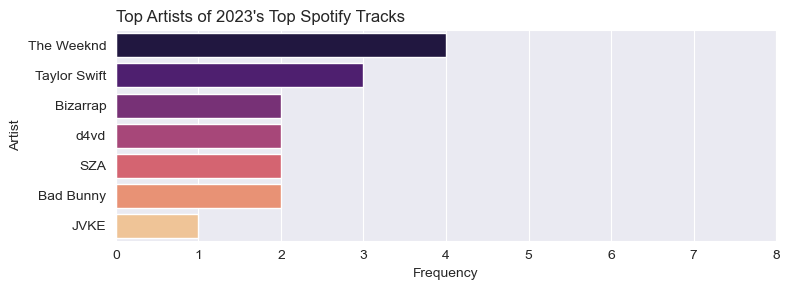

In [17]:
# 2022
artists_2022 = top_tracks_df[top_tracks_df['chart_year'] == 2022]['artist_name']
top_artists_2022 = artists_2022.value_counts().head(7)
plt.figure(figsize=(8, 3))
sns.barplot(x=top_artists_2022.values, y=top_artists_2022.index, palette='magma')
plt.xlabel('Frequency')
plt.ylabel('Artist')
plt.xlim(0, 8)
plt.title('Top Artists of 2022\'s Top Spotify Tracks', loc='left')
plt.tight_layout()
plt.show()

# 2023
artists_2023 = top_tracks_df[top_tracks_df['chart_year'] == 2023]['artist_name']
top_artists_2023 = artists_2023.value_counts().head(7)
plt.figure(figsize=(8, 3))
sns.barplot(x=top_artists_2023.values, y=top_artists_2023.index, palette='magma')
plt.xlabel('Frequency')
plt.ylabel('Artist')
plt.xlim(0, 8)
plt.title('Top Artists of 2023\'s Top Spotify Tracks', loc='left')
plt.tight_layout()
plt.show()

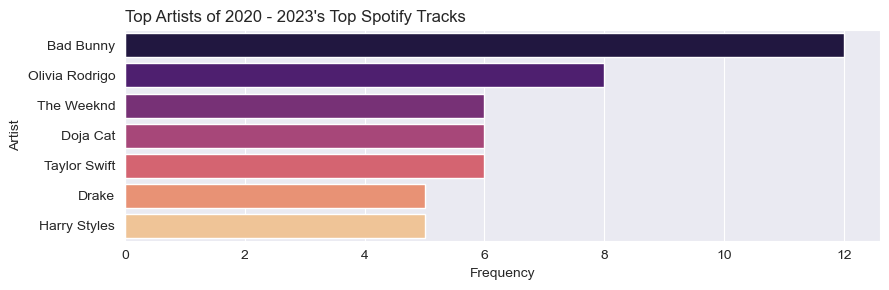

In [18]:
# 2020 - 2023
artists_all = top_tracks_df['artist_name']
top_artists_all = artists_all.value_counts().head(7)
plt.figure(figsize=(9, 3))
sns.barplot(x=top_artists_all.values, y=top_artists_all.index, palette='magma')
plt.xlabel('Frequency')
plt.ylabel('Artist')
plt.title('Top Artists of 2020 - 2023\'s Top Spotify Tracks', loc='left')
plt.tight_layout()
plt.show()

Despite pop technically dominating by genre, Bad Bunny tops being the most frequently appearing artist in our data set with 12 songs of 200. He is followed in far second by Olivia Rodrigo with 8 following her own strong performance as the top artist of 2021. Her music along with the tied followers of The Weeknd, Doja Cat & Taylor Swift are all major contributors of the Pop category, to add context to some of our previous conclusions.

Drake and Harry Styles come just outside the top 5 having not been the top artist for any of the 4 years. Only the top three artists have been able to top a chart year, Taylor Swift being the narrowest miss of a top spot with two tracks behind The Weeknd in 2023.